In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar dataset
df_partidos = pd.read_csv("partidos_cebollitas.csv")

# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# División estándar: 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")


¡Modelo entrenado exitosamente!


In [3]:
# Mostrar coeficientes
print(f"Intercepto (β₀): {modelo_rl.intercept_}")
print(f"Coeficientes (β): {modelo_rl.coef_}")

# Interpretación amigable
for idx, col_name in enumerate(X.columns):
    print(f"Si aumentamos 1 unidad en '{col_name}', la diferencia de goles cambia en promedio {modelo_rl.coef_[idx]:.2f}")


Intercepto (β₀): -2.525719257232977
Coeficientes (β): [ 0.05596278 -0.05125811]
Si aumentamos 1 unidad en 'posesion_local (%)', la diferencia de goles cambia en promedio 0.06
Si aumentamos 1 unidad en 'tiros_arco_local', la diferencia de goles cambia en promedio -0.05


In [4]:
# Hacer predicciones
y_pred = modelo_rl.predict(X_test)

# Comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Predicha'] = y_pred.round(2)

df_resultados.head(10)


,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


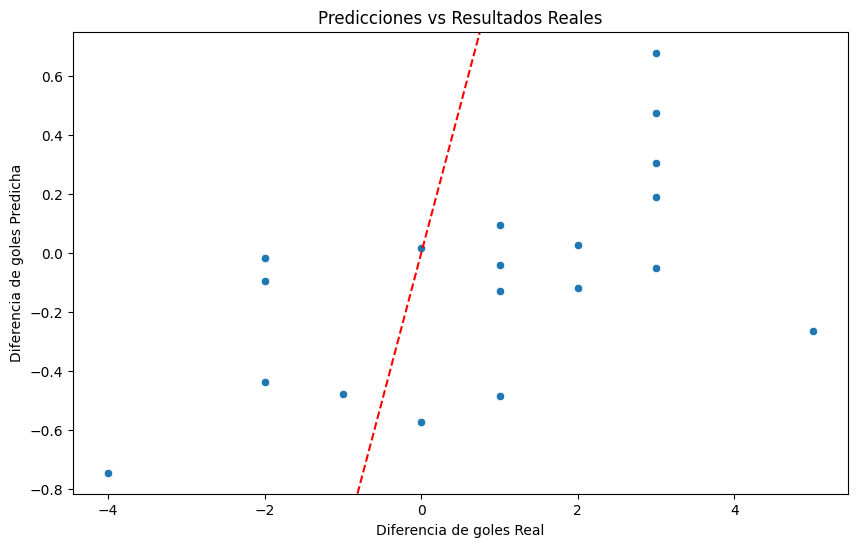

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de goles Real')
plt.ylabel('Diferencia de goles Predicha')
plt.title('Predicciones vs Resultados Reales')
plt.axline((0,0), slope=1, color='red', linestyle='--')  # Línea ideal
plt.show()


In [6]:
import ipywidgets as widgets

# Widgets de entrada
posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesión (%)')
tiros_input = widgets.IntSlider(min=1, max=15, step=1, description='Tiros al Arco')

# Función de predicción
def predecir_goles(posesion, tiros):
    # Crear DataFrame con nombres de columnas esperados por el modelo
    entrada = pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_rl.predict(entrada)[0]
    print(f"Diferencia de goles predicha: {pred:.2f}")


# Mostrar widget interactivo
widgets.interactive(predecir_goles, posesion=posesion_input, tiros=tiros_input)


interactive(children=(FloatSlider(value=30.0, description='Posesión (%)', max=70.0, min=30.0, step=1.0), IntSl…